Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 02: Image Enhancement

## Introduction

This week's sheet should be solved and handed in before **Tuesday, November 16, 2021, 2:00pm**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary.
There will be a similar exercise on every following sheet.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

Euclidean space, In geometry, a two- or three-dimensional space in which the axioms and postulates of Euclidean geometry apply; also, a space in any finite number of dimensions, in which points are designated by coordinates (one for each dimension) and the distance between two points is given by a distance formula.

A cartesian plane is defined by to perpendicular number lines the horizontal one denoted as x-axis and the vertical as y-axis. Points are represented as a tupple where the number of the point reflected into the x-axis is the first number and the second number is the reflection of the same point into the y-axis.

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

An Euclidean norm of a vector is the square toot of the inner product of a vector with itself. 
To add or substract two Euclidean norm vectors, it is first necessary for the operands of both vectors to be the same and if necessary, they must be shifted. While doing this, precision from the operands of smaller number get lost, so if x < y, the result will be y or -y (addition or substraction respectively).
Euclidean distance is the distance of two points in the euclidean space. it is defined as:

$$ d(p,q) = \sqrt[2]{\sum_{i=1} ^{n}(q_{i} - p_{i})^{2}} $$


where $p, q$  are two points in the Eucldean n-space, $q_i , p_i$  are euclidean vectors starting from the origin of the space, and $n$  is the n-space the euclidean space is.

There are other ways to meassure distances, like the pythagorean theorem.

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

between two vectors

## Assignment 1: Contrast enhancement [5 Points]

### a) Image Contrast

Describe the concept of contrast in your own words and introduce different ways to measure it. How can low contrast be caused and when is this a problem (and when not)? What can be done to improve contrast?

Contrast describes the difference between different colors/color values. In a gray-scale image a high contrast means drastically differing values whereas similar color values lead to low contrast. It can be measured on a global scale, trying to describe the contrast of the whole image by calculating the difference between the darkest and lightest point in the image, or locally, where only difference between a pixel and it's neighbors is considered.
Low contrast can have different causes, for example noise in the image, shooting though a dirty surface like a dusty window, very even and soft lighting, or even just shooting with different camera settings, producing images in a different format. This can be a problem when trying to detect objects or even just edges in an image.
Contrast can be improved by using a transfer function, depending on whether global or local contrast should be improved and also the image, this could be a linear function that just extends the range of contrast or a nonlinear function as in gamma correction.

### b) Histogram equalization and entropy

How does histogram equalization work? What is entropy and how is it related to histogram equalization? For your answer focus on the (conceptually simpler) continuous case.

In general, a histogram is used in this context to display the distribution of the grey values in an image. Further on, a non-uniform fashion usually reveals that the contrast is low. Connected to that, the idea of histogram equalization is to distribute the grey values more evenly, more precisely improving the contrast. 

Entropy is the average information content an is defined as $E = -\sum_{i=1...N}P(e_i) * \log_2(P(e_i))$.
This is done by maximizing the information content of an image. To work with something quantifiable, the entropy of the histogram is maximized. In other words, we are looking for a transfer function that is maximizing the entropy. Entropy describes the averaged information content one picture covers.

### c) Discrete histogram equalization

What problems occur when considering discrete images (i.e. with discrete coordinates and a finite number of gray levels)? Explain the tables on the lecture slides (CV-04 slides 22/23).

The problem is that after the calculation $g'(g) = N_g * \sum_{w=0...g} H(w) - 1$ rounds the result into integers. 
When considering discrete images, due to rounding some values which should be mapped to different new values will b mapped to the same value, leading not only to gaps in the new histogram but also an uneven histogram. This is what can be seen in the tables on the lecture slides, a new gray value is calculated according to the frequency of the original one but as they have to be rounded to discrete values, four of them end up being the same (8).

## Assignment 2: Computing Contrast and Entropy [5 Points]


### a) Computing contrast

Provide functions to compute the local contrast, global contrast, and entropy of an image.

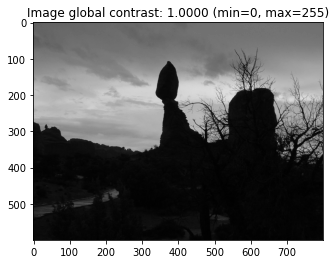

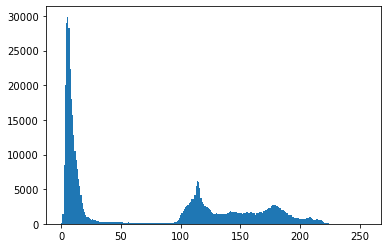

In [16]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

def global_contrast(img, value_range=None):
    """
    Compute the global contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
        value_range (tuple): The minimum and maximum values of the gray scale.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """

    # determine range: simplified, just checks for uint8 
    if value_range is None:
        value_range = (0, 255) if img.dtype == np.uint8 else (0., 1.)

    # YOUR CODE HERE
    contrast = (1/(value_range[1] - value_range[0]) * (np.amax(img, initial=value_range[0], where=value_range[1]) -
                                                       np.amin(img, initial=value_range[0])))

    return contrast

img = imread('images/dark.png')
plt.title("Image global contrast: {:.4f} (min={}, max={})".format(global_contrast(img), img.min(), img.max()))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

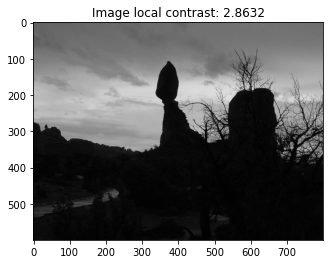

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

def local_contrast(img):
    """
    Compute the local contrast for a given image.
    Args:
        img (ndarray): The grayscale image to compute the contrast for.
    
    Returns:
        contrast (float): The local contrast of the image. 
    """
    M,N = img.shape
    contrast = 0.0
    # YOUR CODE HERE
    for x in range(M):
        for y in range(N):
            #skipping boundaries
            if x == 0 or y == 0 or x == M-1 or y == N-1:
                continue
            
            # looking at neigbouring pixels
            n1 = int(img[x-1,y])
            n2 = int(img[x+1,y])
            n3 = int(img[x,y-1])
            n4 = int(img[x,y+1])
            pixel = img[x,y]
            # averaged difference 
            contrast += np.abs(float(pixel) - float(float(n1 + n2 + n3 + n4)/4))

    contrast = contrast / (M*N)
    return contrast


img = imread('images/dark.png')
plt.title("Image local contrast: {:.4f}".format(local_contrast(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

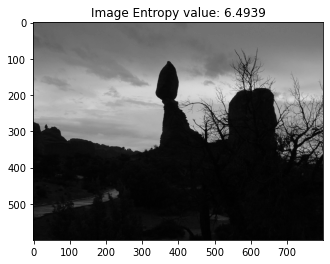

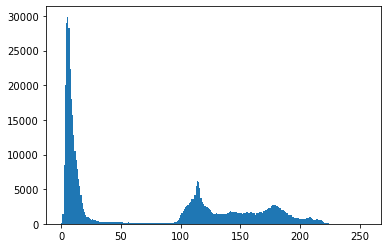

In [28]:
%matplotlib inline
import numpy as np
import math
from imageio import imread

def entropy(img):
    """
    Compute the entropy for a given image.
    Args:
        img (ndarray): The grayscale image to compute the entropy for.

    Returns:
        img_entropy (float): The entropy of the image. 
    """
    # YOUR CODE HERE
    img_entropy = 0
    values, counts = np.unique(np.ndarray.flatten(img), return_counts=True)
    for c in counts:
        p = c/(img.shape[0]*img.shape[1])
        img_entropy -= p * math.log2(p)

    return img_entropy

img = imread('images/dark.png')
plt.title("Image Entropy value: {:.4f}".format(entropy(img)))
plt.imshow(img, vmin=0, vmax=255)
plt.show()

plt.hist(img.flatten(), 256, (0, 255))
plt.show()

### b) Example images

* construct an (artificial) image with high global contrast but low local contrast
* construct an (artificial) image with low global constrast but high local contrast
* construct an (artificial) image with maximal entropy but low local contrast

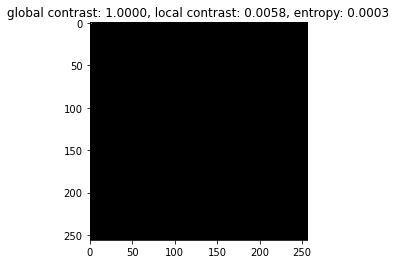

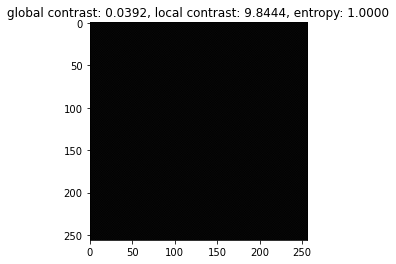

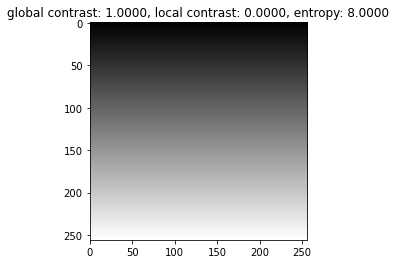

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def image_info(img):
    """ Displays an image, local and global contrast, and the entropy
    
    Args:
        img (ndarray): Image which is displayed and statics are computed for.
        
    """
    info = "global contrast: {:.4f}, local contrast: {:.4f}, entropy: {:.4f}"
    plt.title(info.format(global_contrast(img), local_contrast(img), entropy(img)))
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()


img1 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
img1[1,1] = 255
image_info(img1)


p = 10
global_c = []
local_c = []

img2 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
for i, row in enumerate(img2):
    for ii, pixel in enumerate(row):
        if i%2 == 0 and ii%2 == 0:
            img2[i,ii] = p
        if i%2 == 1 and ii%2 == 1:
            img2[i,ii] = p
global_c.append(global_contrast(img2))
local_c.append(local_contrast(img2))

image_info(img2)


img3 = np.zeros((256, 256),np.uint8)
# YOUR CODE HERE
for i, row in enumerate(img3):
    img3[i:, :]=i
image_info(img3)

## Assignment 3: Adaptive Histogram Equalization (AHE) [5 Points]

We have uploaded the original article on Contrast Limited Adaptive Histogram Equalization to StudIP [Zuiderveld, 1994]. You may use it as a base to answer this exercise.

### a) Adaptive Histogram Equalization (AHE)

Describe in your own words the idea of AHE. Why was it introduced and what are its main drawbacks?

Compared to histogram equalization, it differs in the respect that the adaptive method computes several histograms, where each belongs to a distinct section of the image. Moreover, the method is employing them to redistribute the lightness values of the image. It was introduced, because it can be used for improving the local contrast and enhancing the definitions of edges in each region of an image. Adaptive histogram equalization (ahe) in general is a contrast enhancement method designed to be broadly applicable and having demonstrated effectiveness. However, slow speed and the overenhancement of noise it produces in relatively homogeneous regions are two problems.

### b) Contrast Limited Adaptive Histogram Equalization (CLAHE)

Describe in your own words the idea of CLAHE. Why was it introduced and how does it work? 

CLAHE has the same process as AHE but instead of contrasting all the image, it works by limiting the level of contrast to which existing contrast can be enhanced, which is achieved by limiting the number of pixels which are allowed to have the same gray value, clipping those that would increse the count over the limit and redistributing them equally over all values. It was introduced because AHE could lead to excessive local contrast enhancement, enhancing noise.


### c) Computation of AHE

How can AHE be implemented efficiently? Explain how the interpolation scheme works, why it is a valid approximation, and why it improves the runtime? Can you think of another way to compute AHE efficiently?

Adaptive histogram equalization in its straightforward form, requires the computation of a different neighbourhood histogram and transformation function for each pixel in the image. This makes the method very expensive computationally. Interpolation allows a significant improvement in efficiency without compromising the quality of the result. The image is partitioned into equally sized rectangular tiles, usually in an 8 by 8 grid. 

A histogram, Cumulative distribution function and transformation function is then computed for each of the tiles. The transformation functions are appropriate for the tile center pixels. All other pixels are transformed with up to four transformation functions of the tiles with center pixels closest to them, and are assigned interpolated values. Pixels in the bulk of the image are bilinearly interpolated, accomplished by the following formula: $$s' = (1-y)((1-x)g_A(s)+xg_b(s))+y((1-x)g_C(s)+xgD(s))$$ where $x$ and $y$ are normalized distances with respect to the point in the section calculated; pixels close to the boundary are linearly interpolated, and pixels near corners are transformed with the transformation function of the corner tile. The interpolation coefficients reflect the location of pixels between the closest tile center pixels, so that the result is continuous as the pixel approaches a tile center. 

This procedure reduces the number of transformation functions to be computed dramatically and only imposes the small additional cost of linear interpolation.


### d) Applying AHE and CLAHE

Lookup functions for computing HE, AHE and CLAHE in the module `skimage.exposure` and apply them to the image `canada.png`. Compare your results to the lecture slides (CV-04, slide 31).

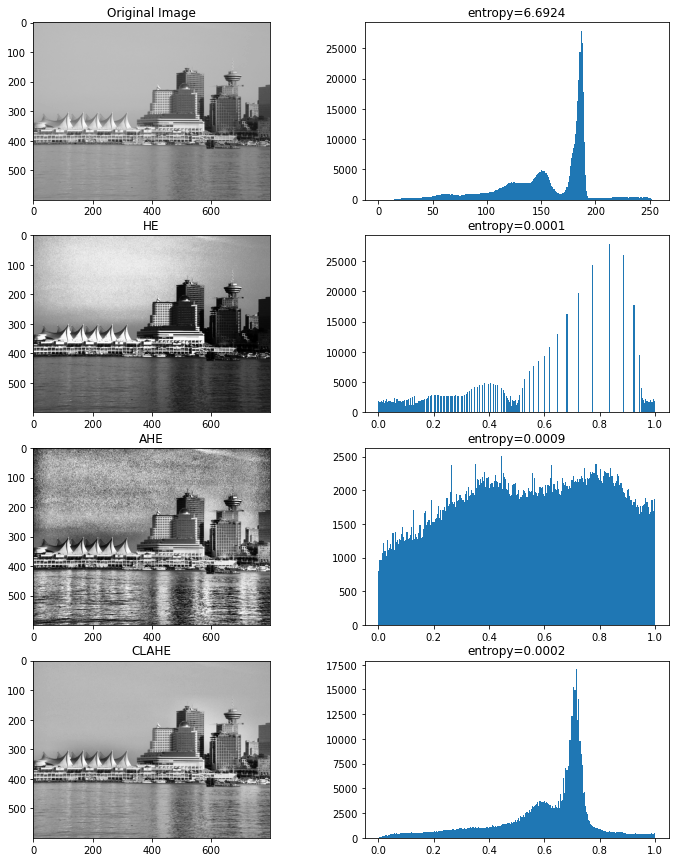

In [22]:
%matplotlib inline
# YOUR CODE HERE
from imageio import imread
import matplotlib.pyplot as plt
from skimage import exposure

img = imread('images/canada.png', pilmode='L')

img_he = exposure.equalize_hist(img) # CHANGE THIS
img_ahe = exposure.equalize_adapthist(img, clip_limit=1) # CHANGE THIS
img_clahe = exposure.equalize_adapthist(img) # CHANGE THIS
# YOUR CODE HERE

plt.figure(figsize=(12, 15))
plt.subplot(4,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.subplot(4,2,2)
plt.title("entropy={:.4f}".format(entropy(img)))
plt.hist(img.flatten(), 256, (0, 255))

plt.subplot(4,2,3)
plt.title("HE")
plt.imshow(img_he)
plt.subplot(4,2,4)
plt.title("entropy={:.4f}".format(entropy(img_he)))
plt.hist(img_he.flatten(), 256, (0, 1))

plt.subplot(4,2,5)
plt.title("AHE")
plt.imshow(img_ahe)
plt.subplot(4,2,6)
plt.title("entropy={:.4f}".format(entropy(img_ahe)))
plt.hist(img_ahe.flatten(), 256, (0, 1))

plt.subplot(4,2,7)
plt.title("CLAHE")
plt.imshow(img_clahe)
plt.subplot(4,2,8)
plt.title("entropy={:.4f}".format(entropy(img_clahe)))
plt.hist(img_clahe.flatten(), 256, (0, 1))

plt.show()

## Assignment 4: Colormaps[5 Points]

Colormaps can be used to map a grayscale image to a pseudo color image for contrast enhancment for human viewing. Three non-monotonic functions are applied to map a gray value to each of the three color channels of the output image.


### a) Describe the following three colormap classes in one sentence each:

* Sequential
* Diverging
* Qualitative

You may have a look at the matplotlib documentation.

- Sequential colormaps incrementally change in lightness and often also saturation, usually in one single hue, and are used to represent information with an ordering.
- Diverging colormaps contain two different colors that change in lightness and possibly saturation to meet at an unsaturated color in the middle.
- Qualitative colormaps contain completely different colors and are used to represent information that is not ordered or related.

For each of the above colormap classes give one example and display the red, green, and blue curves like on (CV-04, slide 35):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


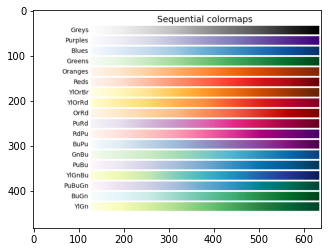

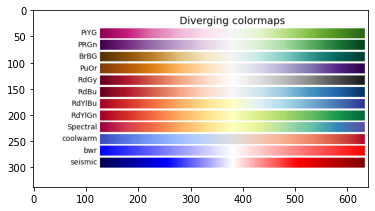

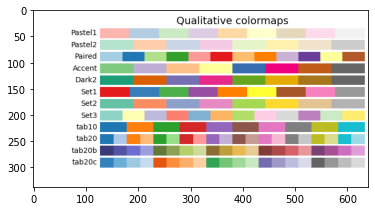

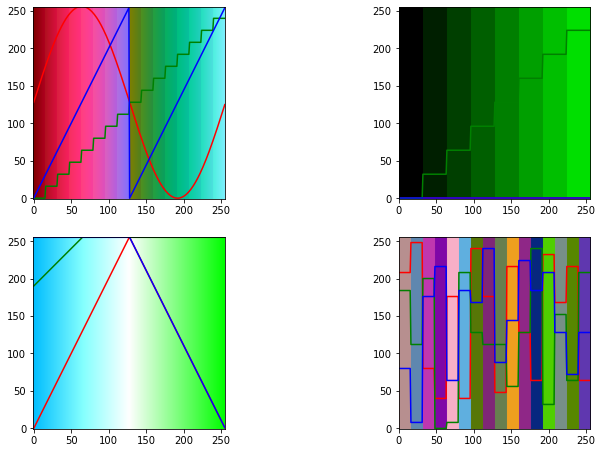

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio

color = []

# The following is just for demonstration: replace and extend by your own examples
color.append(np.asarray((lambda x: np.sin(x/256*2*np.pi)*128+128, 
              lambda x: (x//16) * 16,
              lambda x: (2*x) % 256)))
# YOUR CODE HERE
#sequential
color.append(np.asarray((lambda x: 0*x, 
              lambda x: (x//32) * 32,
              lambda x: 0*x)))

#diverging
color.append(np.asarray((lambda x: np.where(x < 128, 2*x, 255-2*(x-128)), 
              lambda x: np.where(x < 128, 190+x, 255),
              lambda x: np.where(x < 128, 255, 255-2*(x-128)))))

#qualitative
color.append(np.asarray((lambda x: np.repeat(np.random.choice(32,16)*8, 16)+0*x, 
              lambda x: np.repeat(np.random.choice(32,16)*8, 16)+0*x,
              lambda x: np.repeat(np.random.choice(32,16)*8, 16)+0*x )))
# examples from the internet
seq = imageio.imread(imageio.core.urlopen("https://matplotlib.org/stable/_images/sphx_glr_colormaps_002.png").read(), ".png")
div = imageio.imread(imageio.core.urlopen("https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png").read(), ".png")
qual = imageio.imread(imageio.core.urlopen("https://matplotlib.org/stable/_images/sphx_glr_colormaps_006.png").read(), ".png")

plt.figure()
plt.imshow(seq)
plt.figure()
plt.imshow(div)
plt.figure()
plt.imshow(qual)

gray = np.arange(0,256)
a = np.tile(np.arange(256),(256,1))

plt.figure(figsize=(12,12))
for i in range(len(color)):
    plt.subplot((len(color)//2)+1,2,i+1)
    plt.plot(gray, color[i][0](gray), 'red')
    plt.plot(gray, color[i][1](gray), 'green')
    plt.plot(gray, color[i][2](gray), 'blue')
    plt.imshow(np.stack([color[i][0](a),color[i][1](a),color[i][2](a)],axis=2)/256, origin='lower')
plt.show()

### b) Implement Cube Helix colormapping 
Generate a LookUp table with $256 \times 3$ entries describing the color values for all gray values beginning with black (0) up to white (255). Use the given parameters and use the following formula to compute an RGB value from a gray value $g$:
$$ \begin{pmatrix}R \\ G \\ B\end{pmatrix} =  g ^ \gamma + a \begin{pmatrix}0.14861 & + 1.78277 \\
-0.29227 & -0.90649 \\ +1.97294 & 0\end{pmatrix} \begin{pmatrix}\cos \theta \\ \sin \theta\end{pmatrix}$$
with $\theta = 2 \pi (\frac{\text{start_color }}{3} + \text{rotations}\cdot g)$ and $ a = \frac{\gamma\cdot\text{hue}\cdot g\cdot( 1 - \gamma g)}{2}$ (with 'start_color', 'rotations' and 'hue' being parameters describing the form of the helix, and $\gamma$ being the usual $\gamma$-factor).

Remember that this formula is for values between $0$ and $1$.
For more information you may refer to http://astron-soc.in/bulletin/11June/289392011.pdf

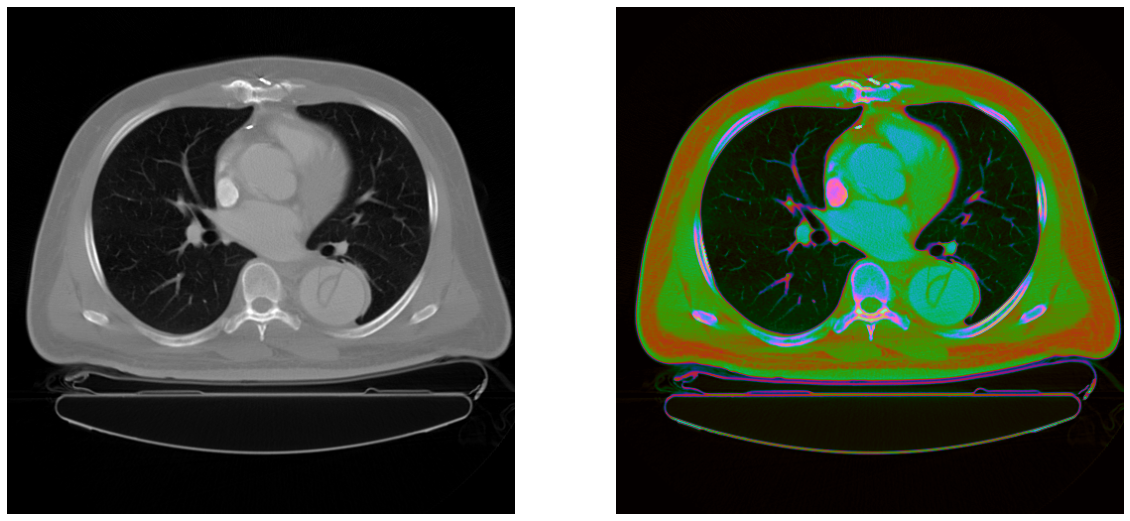

In [42]:
%matplotlib inline
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

start_color = 1
rotations = 3
hue = 2
gamma = 1
m = np.mat([[-.14861, 1.78277],
            [-.29227, -.90649],
            [1.97294, 0]])

def generate_cube_helix_lookup_table():
    """Generate a lookup table for cube helix color mapping.
    
    Return: 
        lookup_table (ndarray): The cube helix color map. (256,3)
    """
    lookup_table = np.empty((256,3), float)
    for i in np.arange(256):
        # YOUR CODE HERE
        theta = 2 * np.pi * (start_color/3 + rotations * (i/256))
        cAs = [np.cos(theta), np.sin(theta)]
        a = (gamma * hue * (i/256)*(1-(gamma*(i/256)))/2)
        lookup_table[i][0] = np.power(i/256, gamma) + (a*np.matmul(m[0], cAs))
        lookup_table[i][1] = np.power(i/256, gamma) + (a*np.matmul(m[1], cAs))
        lookup_table[i][2] = np.power(i/256, gamma) + (a*np.matmul(m[2], cAs))
    return lookup_table


def apply_colormap(img, loookup_table):
    """Apply a colormap to an image
    
    Args:
        img (ndarray): The image (ndim=2).
        lookup_table (ndarray): The lookup table (shape=(256,3)).
        
    Return:
        color_img (ndarray): The color image resulting from application of the colormap.
    """
    color_img = loookup_table[img]
    color_img[color_img>1] = 1.
    color_img[color_img<0] = 0.
    return color_img

img = imread('images/lung.png', pilmode='L')
lookup_table = generate_cube_helix_lookup_table()
img2 = apply_colormap(img, lookup_table)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(img, cmap = 'gray'); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(img2); plt.axis('off')
plt.show()

### Jet Colormap [Bonus]

Explain why the Jet Colormap (used, for example, as standard colormap in matlab), is problematic compared to Cube Helix. Think of perceived luminance and black and white printing.

In [ ]:
# This code was taken from 
# https://jakevdp.github.io/blog/2014/10/16/how-bad-is-your-colormap/

def grayify_cmap(cmap):
    """Return a grayscale version of the colormap
    
    Args:
        cmap (ndarray): RGB Colormap.
    
    Returns:
        (ndarray): Gray Colormap.
    
    """
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

def show_colormap(cmap):
    """Plots RGB colormap and grayified colormap
    
    Args: 
        cmap (ndarray): Colormap.
    
    """
    im = np.outer(np.ones(10), np.arange(100))
    fig, ax = plt.subplots(2, figsize=(6, 1.5),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.1)
    ax[0].imshow(im, cmap=cmap)
    ax[1].imshow(im, cmap=grayify_cmap(cmap))
    
# printing the jet colormap and how it would look like if printed black and white
show_colormap('jet')

# doing the same for cube helix
show_colormap('cubehelix')


YOUR ANSWER HERE